<a href="https://colab.research.google.com/github/PawelSmolinski/MachineLearning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Fetching the Boston Housing dataset from a GitHub repository
url = 'https://raw.githubusercontent.com/PawelSmolinski/MachineLearning/main/Datasets/german_credit_data.csv'

# Reading the dataset into a pandas DataFrame
credit_df = pd.read_csv(url)

In [7]:
# Display the first few rows of the DataFrame
credit_df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
# Generating descriptive statistics of the DataFrame
credit_df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [ ]:
# Check for missing values
print(credit_df.isnull().sum())

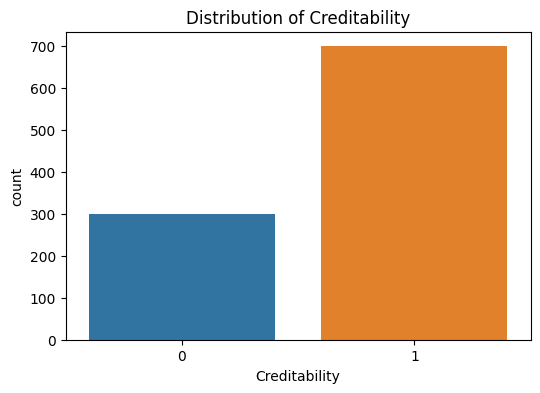

In [ ]:
# Distribution of the Target Variable (Creditability)
plt.figure(figsize=(6, 4))
sns.countplot(x='Creditability', data=credit_df)
plt.title('Distribution of Creditability')
plt.show()

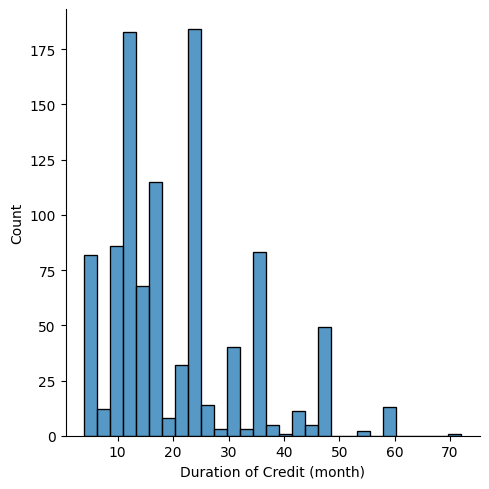

In [ ]:
# Histogram for a specific feature (example: 'Duration of Credit (month)')
sns.displot(credit_df['Duration of Credit (month)'])
plt.show()

In [ ]:
# Calculate the Spearman correlation matrix
corr_spearman = credit_df.corr(method='spearman')

# Plot the heatmap of the Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='seismic', center=0, fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
credit_df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
# Identify numerical columns
numerical_cols = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']  #

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
credit_df[numerical_cols] = scaler.fit_transform(credit_df[numerical_cols])


In [11]:
# One-hot encoding for categorical variables using pd.get_dummies
# Assuming the rest of the columns are categorical
categorical_cols = list(set(credit_df.columns) - set(numerical_cols) - {'Creditability'})
credit_df = pd.get_dummies(credit_df, columns=categorical_cols, drop_first=True) # The drop_first=True argument  is used to avoid multicollinearity


In [ ]:
credit_df.head()

In [16]:
# Splitting into features and target
X = credit_df.drop('Creditability', axis=1)
y = credit_df['Creditability']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

In [17]:
# Train the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Make predictions on the test data
y_pred = log_reg.predict(X_test)

In [21]:
# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7767

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.52      0.59        92
           1       0.81      0.89      0.85       208

    accuracy                           0.78       300
   macro avg       0.74      0.71      0.72       300
weighted avg       0.77      0.78      0.77       300


Confusion Matrix:
 [[ 48  44]
 [ 23 185]]


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the SVM classifier
svm_model = SVC(C = 1, kernel= 'linear')

# Define the number of folds for cross-validation
k = 5

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=k)

# Calculate the average and standard deviation of the cross-validation scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Display the results
print(f"Average Cross-Validation Score (k={k}): {cv_mean:.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_std:.4f}")


Average Cross-Validation Score (k=5): 0.7140
Standard Deviation of Cross-Validation Scores: 0.0710


In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
}

# Define the number of folds for cross-validation
k = 5

# Initialize GridSearchCV with the SVM model, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(svm_model, param_grid, cv=k, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Display the results
print("Best Parameters Found by Grid Search:")
print(best_parameters)
print(f"Best Cross-Validation Score: {best_score:.4f}")

Best Parameters Found by Grid Search:
{'C': 1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.7471


Training Set Metrics:
Accuracy: 0.7943
Precision: 0.8164
Recall: 0.9126
F1 Score: 0.8618
ROC AUC Score: 0.7135

Training Set Confusion Matrix:
[[107 101]
 [ 43 449]]


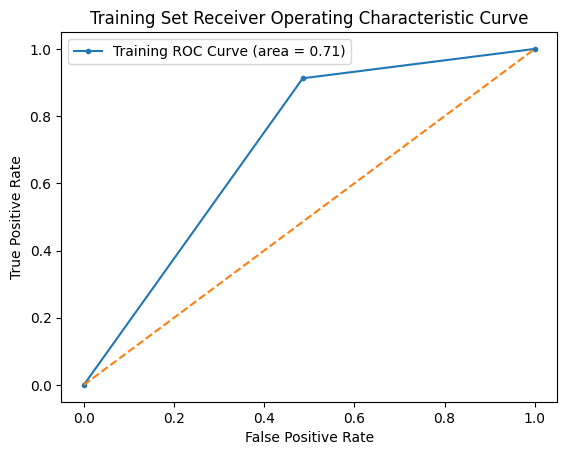

In [34]:
# Predict on the training set
y_train_pred = best_model.predict(X_train)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Print the metrics for the training set
print(f"Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC Score: {train_roc_auc:.4f}")

# Confusion Matrix for the training set
train_cm = confusion_matrix(y_train, y_train_pred)
print("\nTraining Set Confusion Matrix:")
print(train_cm)

# Plotting ROC Curve for the training set
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred)
plt.plot(train_fpr, train_tpr, marker='.', label='Training ROC Curve (area = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Training Set Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Accuracy: 0.7867
Precision: 0.8130
Recall: 0.8990
F1 Score: 0.8539
ROC AUC Score: 0.7158

Confusion Matrix:
[[ 49  43]
 [ 21 187]]


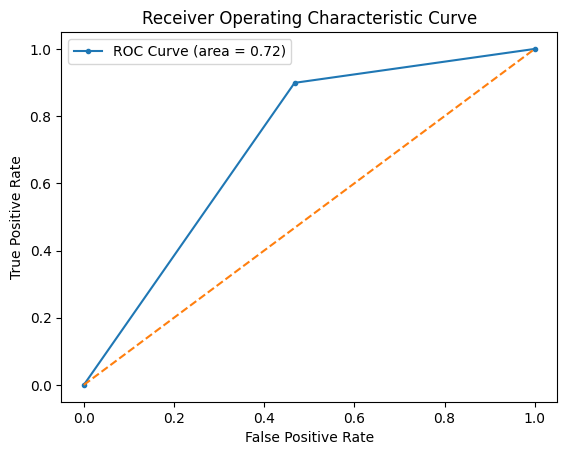

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='.', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
